In [ ]:
# Import pandas library
import pandas as pd
from matplotlib.colors import ListedColormap  
import numpy as nm  
import matplotlib.pyplot as mtp 
from matplotlib.colors import ListedColormap  
# initialize list of lists
data = [[3,1,1], [3,-1,1], [6,1,1], [6,-1,1], [1,0,0], [0,1,0], [0,-1,0], [-1,0,0]]
data1 = [[2,2,1], [2,-2,1], [-2,-2,1], [-2,2,1], [1,1,0], [1,-1,0], [-1,-1,0], [-1,1,0]]
data2 = [[1,1,1], [2,2,1], [2,0,1],[0,0,0], [-1,0,0], [0,1,0]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Col1', 'Col2', 'Output'])
df1 = pd.DataFrame(data1, columns=['Col1', 'Col2', 'Output'])  
df2 = pd.DataFrame(data2, columns=['Col1', 'Col2', 'Output']) 
# print dataframe.
df

,Col1,Col2,Output
0,3,1,1
1,3,-1,1
2,6,1,1
3,6,-1,1
4,1,0,0
5,0,1,0
6,0,-1,0
7,-1,0,0


In [ ]:
def plot_svm(df) : 
    #Extracting Independent and dependent Variable  
    x= df.iloc[:, [0,1]].values  
    y= df.iloc[:, 2].values 
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
    #feature Scaling  
    from sklearn.preprocessing import StandardScaler    
    st_x= StandardScaler()    
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test) 
    from sklearn.svm import SVC # "Support vector classifier"  
    classifier = SVC(kernel='linear', random_state=0)  
    classifier.fit(x_train, y_train) 
      #Predicting the test set result  
    y_pred= classifier.predict(x_test)
    #Creating the Confusion matrix  
    from sklearn.metrics import confusion_matrix  
    cm= confusion_matrix(y_test, y_pred)  
    x_set, y_set = x_train, y_train  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('red', 'green'))(i), label = j)  
    mtp.title('SVM classifier (Training set)')  
    mtp.xlabel('Col1')  
    mtp.ylabel('Col2')  
    mtp.legend()  
    mtp.show()
        #Visulaizing the test set result  

    x_set, y_set = x_test, y_test  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('red','green' )))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('red', 'green'))(i), label = j)  
    mtp.title('SVM classifier (Test set)')  
    mtp.xlabel('Col1')  
    mtp.ylabel('Col2')  
    mtp.legend()  
    mtp.show()    


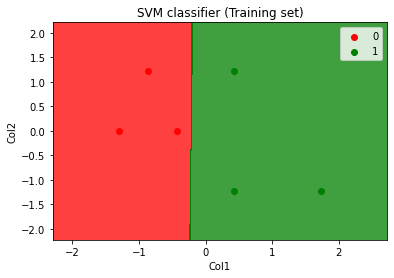

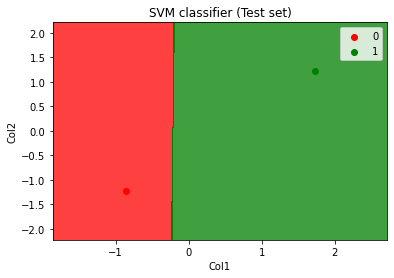

In [ ]:
plot_svm(df)

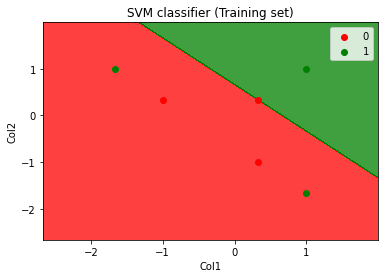

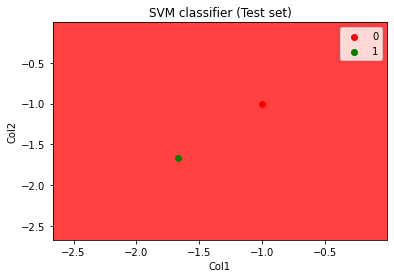

In [ ]:
plot_svm(df1)

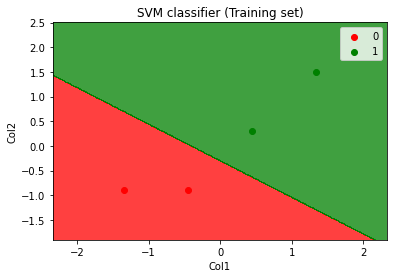

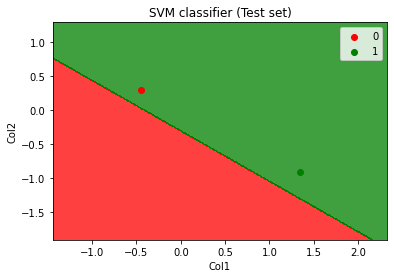

In [ ]:
plot_svm(df2)